In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('datos_de_presion.xlsx')
df.head()

,t_hr,P_psi
0,168.84,334.90
1,171.36,334.62
2,173.88,334.06
3,176.40,333.40
4,178.92,332.54


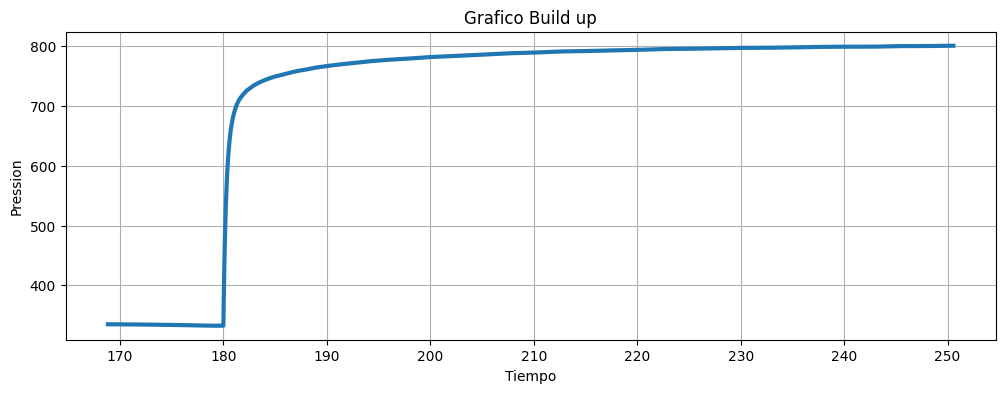

In [3]:
plt.style.use('default')
plt.figure(figsize=(12,4))

plt.plot(df['t_hr'], df['P_psi'],lw=3)

plt.xlabel('Tiempo') 
plt.ylabel('Pression')

plt.title('Grafico Build up')
plt.grid()

Del grafico podemos observar que el tiempo de cierre son 180 hrs o sea tp = 180

In [4]:
tp = 180 #hrs

A partir de aca generamos las diferentes columnas que nos serviran para el analisis

In [5]:
df['dt'] = df['t_hr'] - tp
df.head(10)

,t_hr,P_psi,dt
0,168.84000,334.90,-11.16000
1,171.36000,334.62,-8.64000
2,173.88000,334.06,-6.12000
3,176.40000,333.40,-3.60000
4,178.92000,332.54,-1.08000
5,180.00000,332.48,0.00000
6,180.00252,335.32,0.00252
7,180.00504,338.60,0.00504
8,180.00756,341.68,0.00756
9,180.01008,345.42,0.01008


In [6]:
df_bu = df.loc[5:,:]
df_bu.head()

,t_hr,P_psi,dt
5,180.00000,332.48,0.00000
6,180.00252,335.32,0.00252
7,180.00504,338.60,0.00504
8,180.00756,341.68,0.00756
9,180.01008,345.42,0.01008


In [7]:
df_bu['(tp + dt)/dt'] = np.zeros(len(df_bu))
df_bu['(tp + dt)/dt'].iloc[1:] = (df_bu['dt'].iloc[1:]+tp)/df_bu['dt'].iloc[1:]
df_bu.head()

,t_hr,P_psi,dt,(tp + dt)/dt
5,180.00000,332.48,0.00000,0.000000
6,180.00252,335.32,0.00252,71429.571428
7,180.00504,338.60,0.00504,35715.285714
8,180.00756,341.68,0.00756,23810.523809
9,180.01008,345.42,0.01008,17858.142857


In [8]:
df_bu['te'] = np.zeros(len(df_bu))
df_bu['te'].iloc[1:] = tp/df_bu['(tp + dt)/dt'].iloc[1:]
df_bu.head()

,t_hr,P_psi,dt,(tp + dt)/dt,te
5,180.00000,332.48,0.00000,0.000000,0.000000
6,180.00252,335.32,0.00252,71429.571428,0.002520
7,180.00504,338.60,0.00504,35715.285714,0.005040
8,180.00756,341.68,0.00756,23810.523809,0.007560
9,180.01008,345.42,0.01008,17858.142857,0.010079


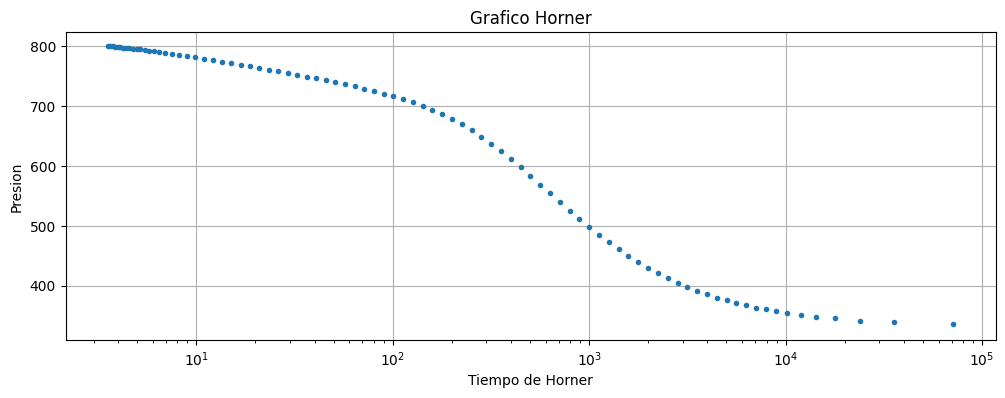

In [9]:
plt.figure(figsize=(12,4))
plt.semilogx(df_bu['(tp + dt)/dt'], df_bu['P_psi'], '.')
plt.xlabel('Tiempo de Horner') 
plt.ylabel('Presion')

plt.title('Grafico Horner')
plt.grid()

In [10]:
df1 = df_bu.iloc[45:, :]
#dropeamos tiempo = 0


X = np.log(np.array(df1['(tp + dt)/dt']))
y = np.array(df1['P_psi'])

def regression(x, y):
    n = np.size(x)
    
    m_x, m_y = np.mean(x), np.mean(y)
    
    SS_xy = np.sum(x*y) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
    
    return (b_0, b_1) 

c, m = regression(X, y)
print('La pediente de la recta semilog de Presion vs tiempo es:', m)
print('La intersepcion de la recta semilog de Presion vs tiempo es:', c)

La pediente de la recta semilog de Presion vs tiempo es: -24.851582325294213
La intersepcion de la recta semilog de Presion vs tiempo es: 836.2870912418603


In [11]:
X_r=X.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_r, y)
print("el score es:", reg.score(X_r, y))
print('La pediente de la recta semilog de Presion vs tiempo es:', reg.coef_)
print('La intersepcion de la recta semilog de Presion vs tiempo es:', reg.intercept_)

el score es: 0.9887574280219067
La pediente de la recta semilog de Presion vs tiempo es: [-24.85158233]
La intersepcion de la recta semilog de Presion vs tiempo es: 836.2870912418608


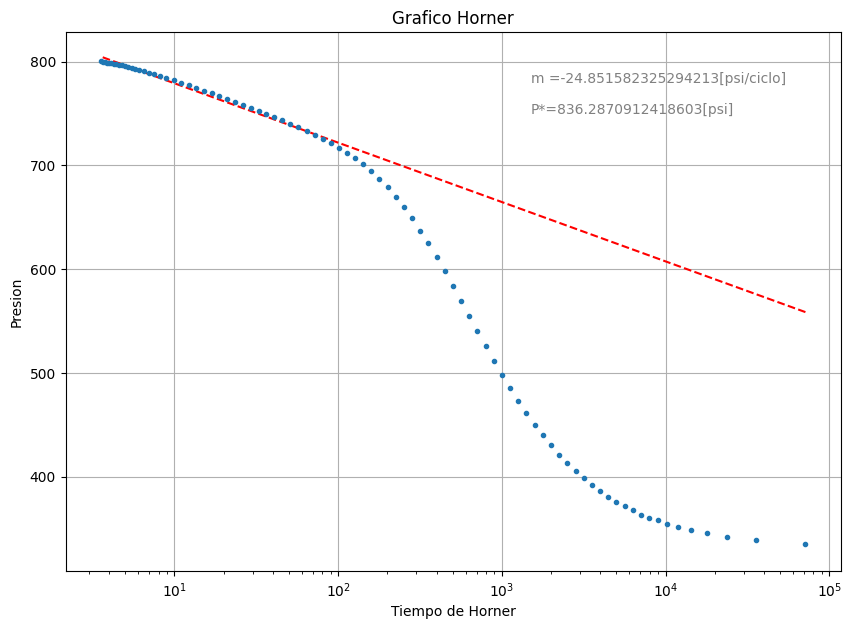

In [12]:
x_reg = np.log(np.array(df_bu['(tp + dt)/dt']))
y_reg = m * x_reg + c
plt.figure(figsize = (10, 7))



plt.semilogx(df_bu['(tp + dt)/dt'], y_reg, '--', color = 'r', ms = 0.5)

plt.semilogx(df_bu['(tp + dt)/dt'], df_bu['P_psi'], '.')
plt.xlabel('Tiempo de Horner') 
plt.ylabel('Presion')


plt.title('Grafico Horner')

plt.text(1500, 780, f'm ={m}[psi/ciclo]', fontsize=10, color='gray')
plt.text(1500, 750, f'P*={c}[psi]', fontsize=10, color='gray')
plt.grid()

Con esto calcularemos l apermeabilidad **k** y el daño **s**

Integramos mas variaple para analizar la derivada

In [13]:
df_bu['deltaP'] = np.abs(df_bu['P_psi']-332.48)
df_bu['d(deltaP)'] = np.zeros(len(df_bu))
df_bu['d(deltaP)'].iloc[1:] = np.abs(np.diff(df_bu['deltaP']))

df_bu['Pdash'] = np.zeros(len(df_bu))
df_bu['Pdash'].iloc[1:] = df_bu['dt'].iloc[1:]*df_bu['d(deltaP)'].iloc[1:]/df_bu['dt'].iloc[1:]
df_bu.head()

,t_hr,P_psi,dt,(tp + dt)/dt,te,deltaP,d(deltaP),Pdash
5,180.00000,332.48,0.00000,0.000000,0.000000,0.00,0.00,0.00
6,180.00252,335.32,0.00252,71429.571428,0.002520,2.84,2.84,2.84
7,180.00504,338.60,0.00504,35715.285714,0.005040,6.12,3.28,3.28
8,180.00756,341.68,0.00756,23810.523809,0.007560,9.20,3.08,3.08
9,180.01008,345.42,0.01008,17858.142857,0.010079,12.94,3.74,3.74


In [16]:
df_bu.drop(columns = ['deltaP', 'd(deltaP)', 'Pdash'], inplace = True)
df_bu.head()

,t_hr,P_psi,dt,(tp + dt)/dt,te
5,180.00000,332.48,0.00000,0.000000,0.000000
6,180.00252,335.32,0.00252,71429.571428,0.002520
7,180.00504,338.60,0.00504,35715.285714,0.005040
8,180.00756,341.68,0.00756,23810.523809,0.007560
9,180.01008,345.42,0.01008,17858.142857,0.010079


In [20]:
P_psi = np.array(df_bu['P_psi'])
dp = np.array(P_psi[1:] - P_psi[0:-1] )
te = np.array(df_bu['te'])
dt_e = np.array(te[1:]-te[0:-1])

In [22]:
dpdt_e = dp[0:]/dt_e
# dpdt_e = dPdt_e + np.zeros(85)
dpdt_e = list(dpdt_e)
dpdt_e.append(0)
dpdt_e = np.array(dpdt_e)

In [23]:
df_bu['dp/dte']  = dpdt_e
df_bu.head()

,t_hr,P_psi,dt,(tp + dt)/dt,te,dp/dte
5,180.00000,332.48,0.00000,0.000000,0.000000,1126.999905
6,180.00252,335.32,0.00252,71429.571428,0.002520,1301.641969
7,180.00504,338.60,0.00504,35715.285714,0.005040,1222.307779
8,180.00756,341.68,0.00756,23810.523809,0.007560,1484.272432
9,180.01008,345.42,0.01008,17858.142857,0.010079,1103.313607


In [24]:
df_bu['te*dp/dt_e'] = df_bu['dp/dte']*df_bu['te'] 
df_bu.head()

,t_hr,P_psi,dt,(tp + dt)/dt,te,dp/dte,te*dp/dt_e
5,180.00000,332.48,0.00000,0.000000,0.000000,1126.999905,0.000000
6,180.00252,335.32,0.00252,71429.571428,0.002520,1301.641969,3.280092
7,180.00504,338.60,0.00504,35715.285714,0.005040,1222.307779,6.160259
8,180.00756,341.68,0.00756,23810.523809,0.007560,1484.272432,11.220628
9,180.01008,345.42,0.01008,17858.142857,0.010079,1103.313607,11.120778


In [25]:
df_bu['DeltaP'] = df_bu['P_psi']-332 
df_bu.head()

,t_hr,P_psi,dt,(tp + dt)/dt,te,dp/dte,te*dp/dt_e,DeltaP
5,180.00000,332.48,0.00000,0.000000,0.000000,1126.999905,0.000000,0.48
6,180.00252,335.32,0.00252,71429.571428,0.002520,1301.641969,3.280092,3.32
7,180.00504,338.60,0.00504,35715.285714,0.005040,1222.307779,6.160259,6.60
8,180.00756,341.68,0.00756,23810.523809,0.007560,1484.272432,11.220628,9.68
9,180.01008,345.42,0.01008,17858.142857,0.010079,1103.313607,11.120778,13.42


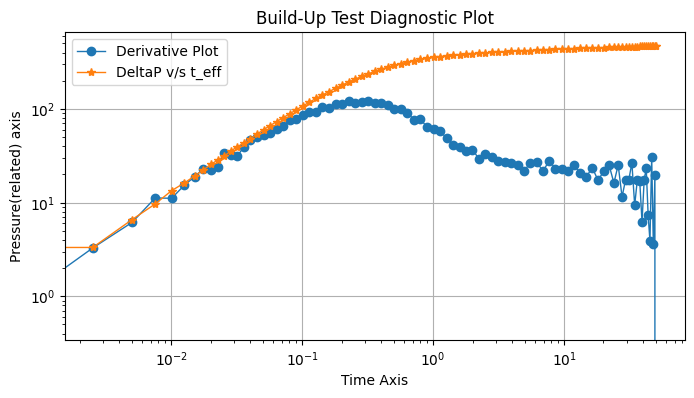

In [26]:
plt.style.use('default')
plt.figure(figsize=(8,4))
plt.loglog(df_bu['te'], df_bu['te*dp/dt_e'],linewidth=1, label ='Derivative Plot',marker='o')
#plt.xlim(0.0001,80)

plt.xlabel('Time Axis')
plt.ylabel('Pressure(related) axis')

plt.loglog(df_bu['te'], df_bu['DeltaP'],linewidth=1, label = 'DeltaP v/s t_eff',marker='*')

plt.title('Build-Up Test Diagnostic Plot')
plt.legend(loc='best')
plt.grid()